In [4]:
import Accuracy2
import Classification

testing


{'train_accuracy': {'slope': np.float64(-0.06143139532468477),
  'intercept': np.float64(-0.35855873943655525),
  'r2_score': 0.9687913989144892,
  'rmse': 0.12727584892376578,
  'decay_rate': np.float64(0.06143139532468477),
  'predicted_limit': 1.0},
 'val_accuracy': {'slope': np.float64(-0.0490241176658734),
  'intercept': np.float64(-0.5071947748773327),
  'r2_score': 0.9376131389566755,
  'rmse': 0.14597487768461956,
  'decay_rate': np.float64(0.0490241176658734),
  'predicted_limit': 1.0},
 'train_loss': {'slope': np.float64(-0.06236562400948846),
  'intercept': np.float64(0.8561431200066842),
  'r2_score': 0.9695625362603955,
  'rmse': 0.12755432783001544,
  'decay_rate': np.float64(0.06236562400948846)},
 'val_loss': {'slope': np.float64(-0.04932010838322152),
  'intercept': np.float64(0.714559209729247),
  'r2_score': 0.9369536819100074,
  'rmse': 0.1476822955980638,
  'decay_rate': np.float64(0.04932010838322152)}}

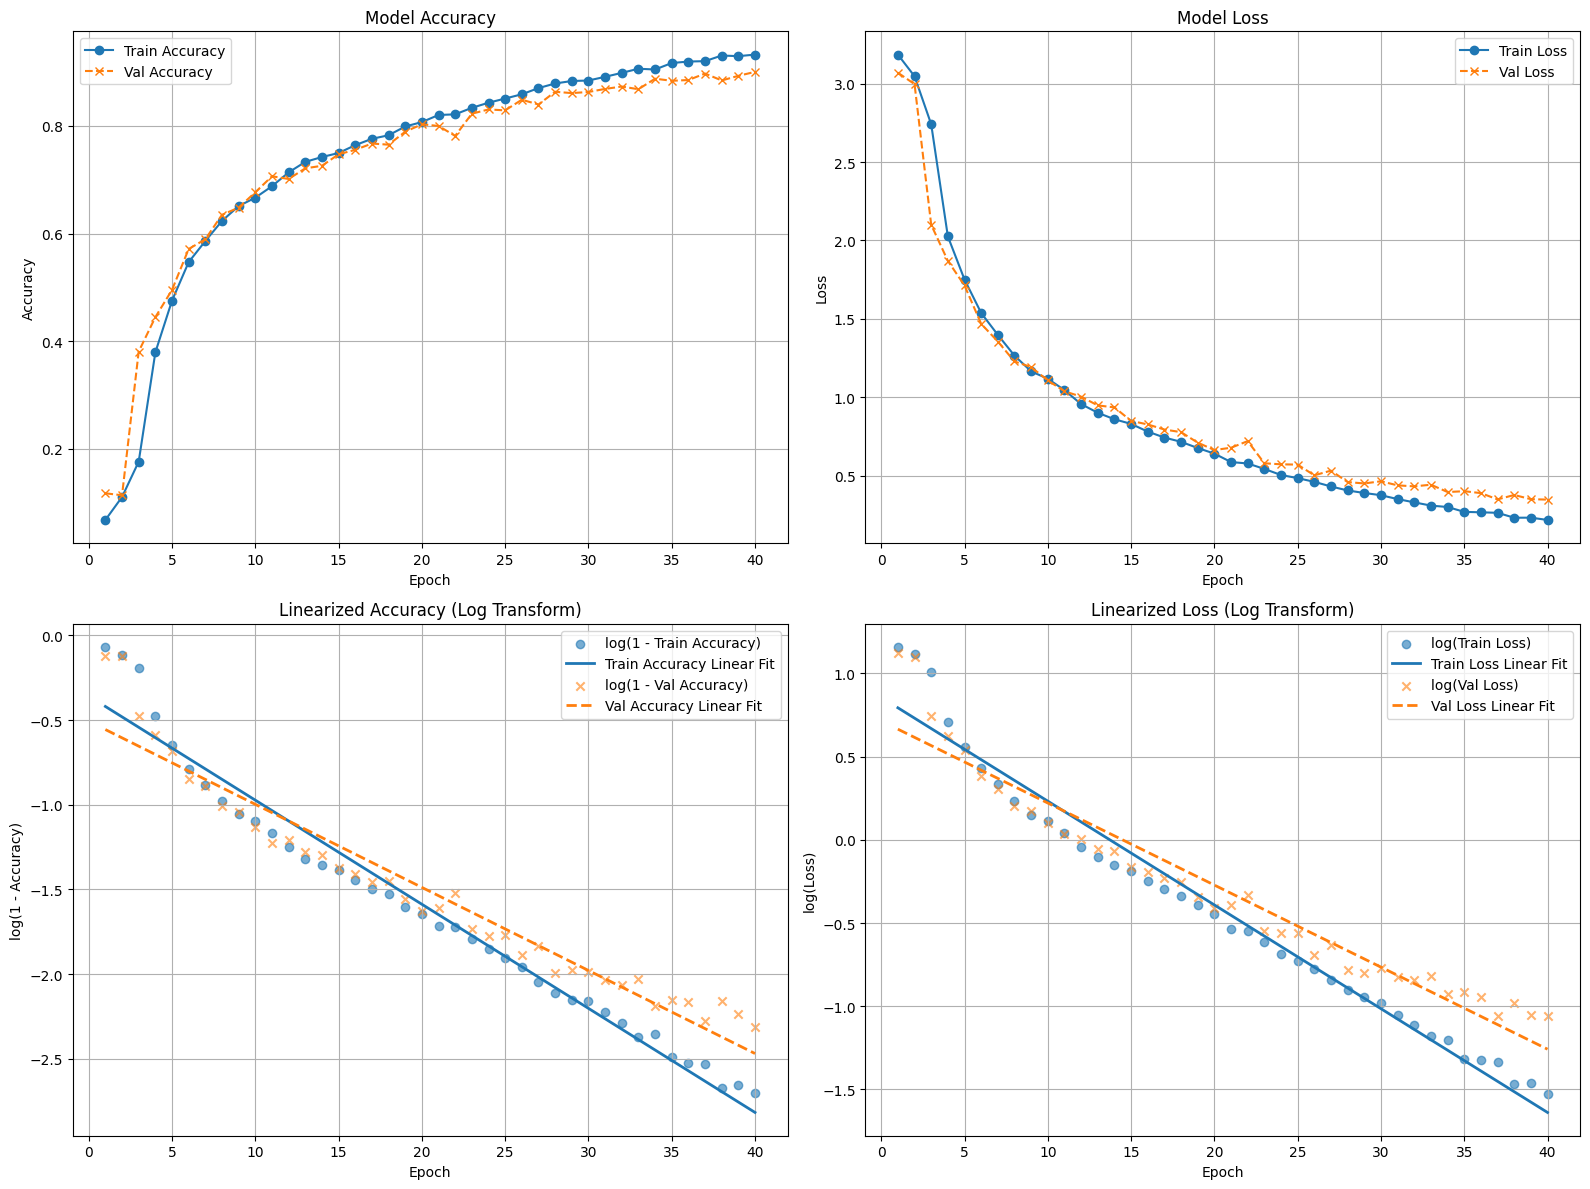

In [5]:
Accuracy2.acc_det("Data 1 Accuracy.csv","Data 1 Accuracy.png")

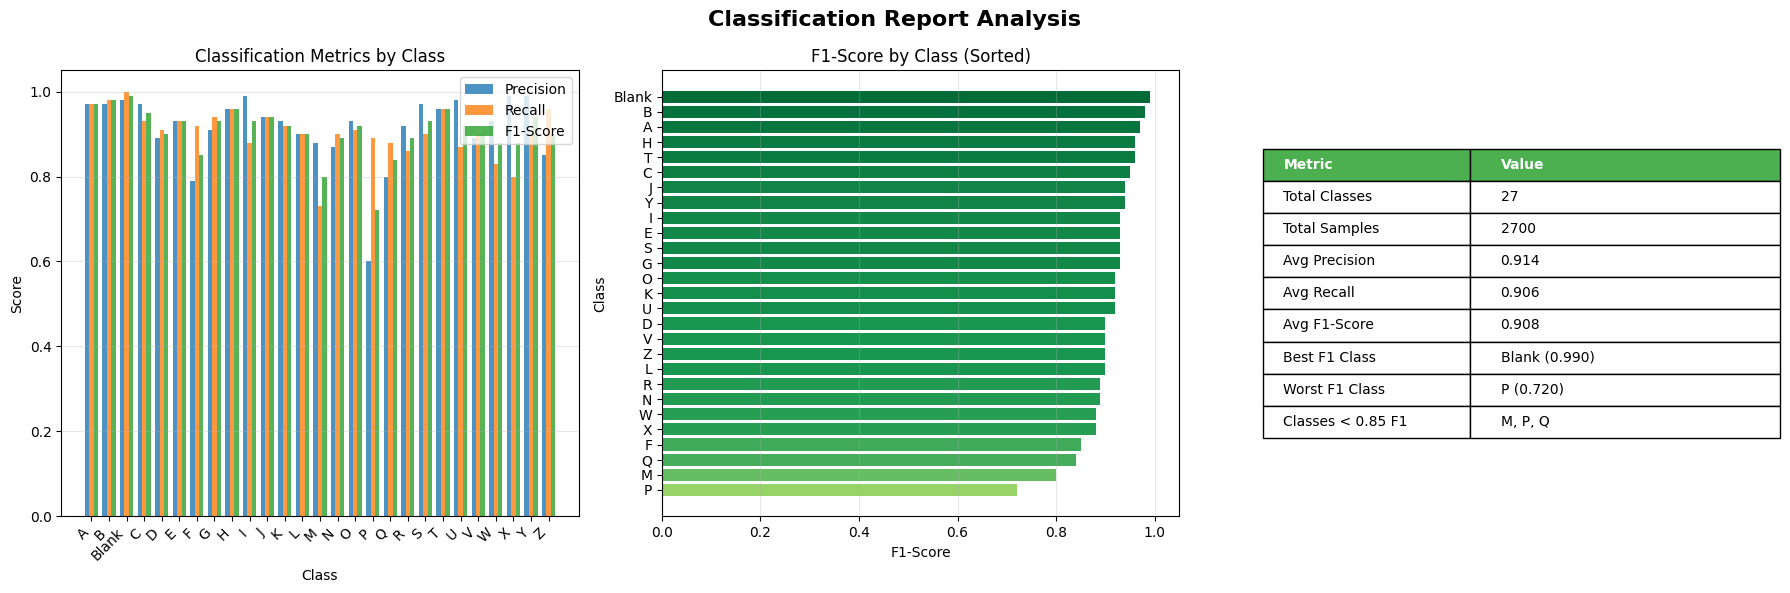

,Class,Precision,Recall,F1-Score,Support
0,A,0.97,0.97,0.97,100
1,B,0.97,0.98,0.98,100
2,Blank,0.98,1.00,0.99,100
3,C,0.97,0.93,0.95,100
4,D,0.89,0.91,0.90,100
5,E,0.93,0.93,0.93,100
6,F,0.79,0.92,0.85,100
7,G,0.91,0.94,0.93,100
8,H,0.96,0.96,0.96,100
9,I,0.99,0.88,0.93,100


In [6]:
Classification.plot_classification_report("Data 1 Classification.txt", "Data 1 Classification.png")